In [62]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
print(df.head())
perch_full = df.to_numpy()


import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(perch_full,perch_weight)
# => 세가지 특성을 이용해 새로운 특성을 만들어낸다

   length   height   width
0     8.4     2.11    1.41
1    13.7     3.53    2.00
2    15.0     3.82    2.43
3    16.2     4.59    2.63
4    17.4     4.59    2.94


In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

# 무게 = a*길이 + b*높이 + c*두께 + d*1 
# 절편항은 필요없기때문에 뺀다
poly = PolynomialFeatures(include_bias=False) # 명시적
poly.fit([[2,3]])
print(poly.transform([[2,3]]))


[[1. 2. 3. 4. 6. 9.]]
[[2. 3. 4. 6. 9.]]


In [64]:
poly = PolynomialFeatures()
poly.fit(x_train)
x_train_poly = poly.transform(x_train)
print(x_train_poly.shape)
# 1을 제외한 9개의 특성이 어떻게 만들어졌는지 확인
print(poly.get_feature_names_out())

x_test_poly = poly.transform(x_test)

(42, 10)
['1' 'x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_poly, y_train)
print(lr.score(x_train_poly,y_train))
print(lr.score(x_test_poly,y_test))

0.9969864930856169
0.8783132612814325


In [66]:
poly = PolynomialFeatures(degree=5,include_bias=False) # 최고차항수를 늘리면 특성이 늘어난다.
poly.fit(x_train)
x_train_poly = poly.transform(x_train)
print(x_train_poly.shape)
x_test_poly = poly.transform(x_test)

lr.fit(x_train_poly, y_train)
print(lr.score(x_train_poly,y_train))
print(lr.score(x_test_poly,y_test))
# 테스트셋의 점수가 음수가 나왔다.
# 특성갯수가 많아져서 모델이 훈련셋을 완벽하게 학습해서 과대적합 되었기 때문이다.
# => 규제와 스케일을 해볼것이다.

(42, 55)
0.9999999999999579
-30867.506188090658


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_poly)
x_train_scaled = scaler.transform(x_train_poly)
x_test_scaled = scaler.transform(x_test_poly)

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
print(ridge.score(x_train_scaled, y_train))
print(ridge.score(x_test_scaled, y_test))

# alpha는 규제의 강도를 뜻한다. 적절한 값을 찾기위해서 R2그래프를 그려보아야 한다.



0.997214995965383
0.9099279443333178


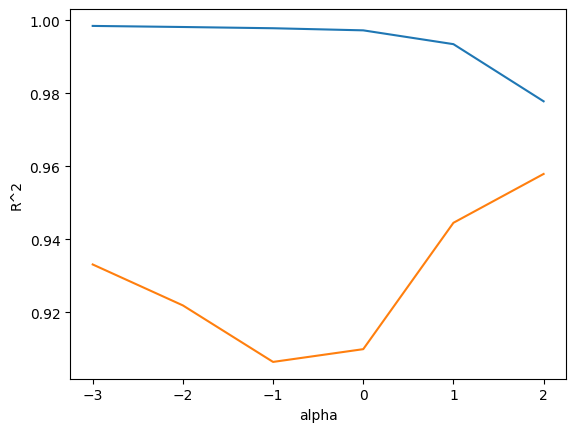

In [68]:
import matplotlib.pyplot as plt
train_score =[]
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha= alpha)
    ridge.fit(x_train_scaled,y_train)
    train_score.append(ridge.score(x_train_scaled,y_train))
    test_score.append(ridge.score(x_test_scaled, y_test))
    
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# alphs == 1  즉 10^1=10 에서 가장 이상적인듯하다

In [69]:
ridge = Ridge(alpha= 10)
ridge.fit(x_train_scaled,y_train)
print(ridge.score(x_train_scaled,y_train))
print(ridge.score(x_test_scaled, y_test))

0.9934339840579514
0.944524730233808


c:\Users\82105\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.770e+02, tolerance: 3.492e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\82105\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.931e+03, tolerance: 3.492e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\82105\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

0.9964724445540261
0.920124589773379
0.9928114076751346
0.938429926426725


c:\Users\82105\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.476e+02, tolerance: 3.492e+02
  model = cd_fast.enet_coordinate_descent(


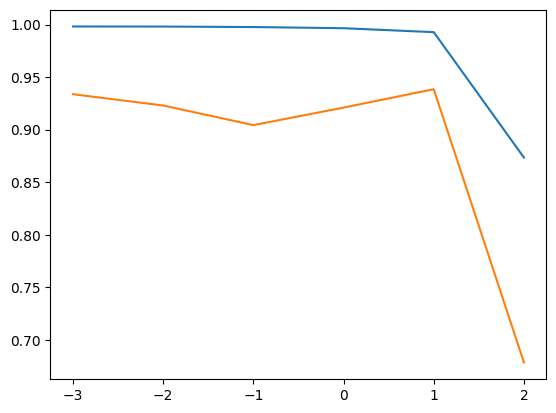

In [73]:
# 라쏘회귀
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
print(lasso.score(x_train_scaled, y_train))
print(lasso.score(x_test_scaled, y_test))

train_score = []
test_score = []
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(x_train_scaled, y_train)
    train_score.append(lasso.score(x_train_scaled, y_train))
    test_score.append(lasso.score(x_test_scaled, y_test))
    
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list),test_score)
# alpha =10가 나은듯

lasso = Lasso(alpha=10)
lasso.fit(x_train_scaled,y_train)
print(lasso.score(x_train_scaled, y_train))
print(lasso.score(x_test_scaled, y_test))
# 그럼에도 과대적합이 일어났다 망햇다.
